In [1082]:
import math
del sys.modules['feature']
#import seaborn as sns
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import feature as ft

In [1029]:
try:
    del df
    del df_fix
except NameError:
    pass

#df = pd.read_csv("Daten/Jannis_16_06.csv",sep=";")
#df = pd.read_csv("Daten/Fiona_21.06.csv",sep=",")
df = pd.read_csv("Daten/Fiona_21.06.csv",sep=",")
df['Gaze Y'] = df['Gaze Y'].fillna(0)
df['Gaze X'] = df['Gaze X'].fillna(0)
df['Gaze X'] = df['Gaze X'].astype(int)
df['Gaze Y'] = df['Gaze Y'].astype(int)
df['Lost Track'] = df['Lost Track'].notna().astype(int)
# Zeit in MS
df['Timestamp in ms'] = df['Timestamp'] * 1000
df['Timestamp in ms'] = df['Timestamp in ms'].astype(int)

# Generiert Geschwindigkeit (Nicht Fertig)
df
#df.to_csv("test_test.csv")
#df["Gaze
# Y"][1773:2324].mean()

,Unnamed: 0,Timestamp,Gaze X,Gaze Y,Lost Track,Confidence,Timestamp in ms
0,0,0.003988,260,581,0,TrackingConfidence.HIGH,3
1,1,0.044087,275,586,0,TrackingConfidence.HIGH,44
2,2,0.089862,280,588,0,TrackingConfidence.HIGH,89
3,3,0.136634,312,609,0,TrackingConfidence.HIGH,136
4,4,0.183798,311,608,0,TrackingConfidence.HIGH,183
...,...,...,...,...,...,...,...
4472,4472,198.343543,936,366,0,TrackingConfidence.HIGH,198343
4473,4473,198.390480,943,370,0,TrackingConfidence.HIGH,198390
4474,4474,198.451554,929,371,0,TrackingConfidence.HIGH,198451
4475,4475,198.514757,920,377,0,TrackingConfidence.HIGH,198514


,Unnamed: 0,Timestamp,Gaze X,Gaze Y,Lost Track,Confidence,Timestamp in ms
0,0,0.003988,260,581,NaN,TrackingConfidence.HIGH,3
1,1,0.044087,275,586,NaN,TrackingConfidence.HIGH,44
2,2,0.089862,280,588,NaN,TrackingConfidence.HIGH,89
3,3,0.136634,312,609,NaN,TrackingConfidence.HIGH,136
4,4,0.183798,311,608,NaN,TrackingConfidence.HIGH,183
...,...,...,...,...,...,...,...
4472,4472,198.343543,936,366,NaN,TrackingConfidence.HIGH,198343
4473,4473,198.390480,943,370,NaN,TrackingConfidence.HIGH,198390
4474,4474,198.451554,929,371,NaN,TrackingConfidence.HIGH,198451
4475,4475,198.514757,920,377,NaN,TrackingConfidence.HIGH,198514


In [919]:
df_ges = ft.ges(df)

In [920]:
df_ges

,dx,dy,d,vx,vy,v,a
0,15,5,15,374,124,394,1
1,5,2,5,109,43,117,1
2,32,21,38,684,448,818,0
3,-1,-1,1,-21,21,29,0
4,2,2,2,64,64,91,0
...,...,...,...,...,...,...,...
4471,10,7,12,216,151,263,0
4472,7,4,8,149,85,171,1
4473,-14,1,14,-229,16,229,-1
4474,-9,6,10,-142,94,171,0


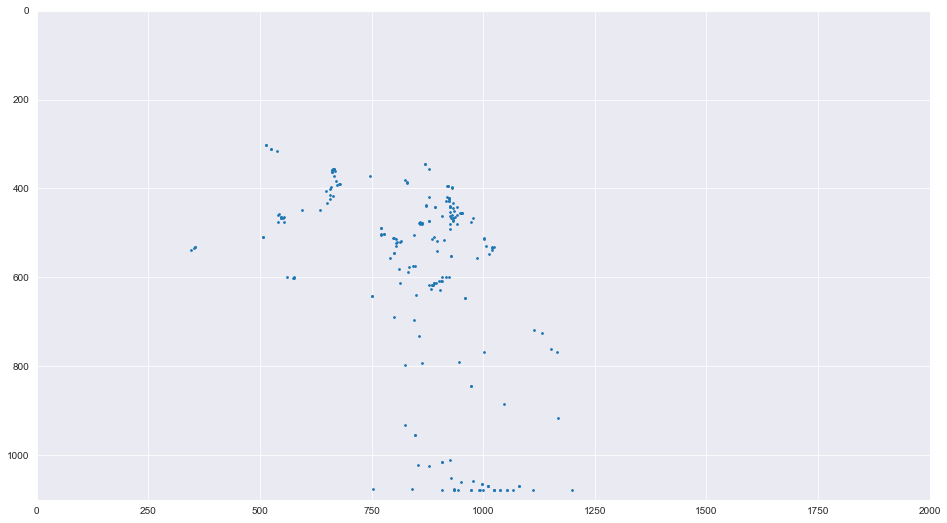

In [1030]:
df2 = pd.concat([df,df_ges],axis=1)
df2 = df2[(df2['Timestamp'].between(30,40) == True)]
x = df2["Gaze X"]
y = df2["Gaze Y"]
#z = df2['Fixation']
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
#t = df["Timestamp"].head(100)
plt.axis([0,2000,1100,0])
plt.scatter(x,y, s = 3)
plt.show()

In [851]:
df2

,Unnamed: 0,Timestamp,Gaze X,Gaze Y,Lost Track,Confidence,Timestamp in ms,dx,dy,d,vx,vy,v,a
695,695,30.002202,1007,530,NaN,TrackingConfidence.HIGH,30002,-34.0,-55.0,64.0,-553.0,896.0,1053.0,0.0
696,696,30.063580,973,475,NaN,TrackingConfidence.HIGH,30063,-41.0,-2.0,41.0,-847.0,41.0,848.0,-1.0
697,697,30.111967,932,473,NaN,TrackingConfidence.HIGH,30111,0.0,-1.0,1.0,0.0,22.0,22.0,0.0
698,698,30.157242,932,472,NaN,TrackingConfidence.HIGH,30157,1.0,-6.0,6.0,21.0,126.0,128.0,0.0
699,699,30.204543,933,466,NaN,TrackingConfidence.HIGH,30204,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,913,39.810563,346,539,NaN,TrackingConfidence.HIGH,39810,231.0,61.0,238.0,5004.0,1321.0,5175.0,1.0
914,914,39.856725,577,600,NaN,TrackingConfidence.HIGH,39856,0.0,1.0,1.0,0.0,21.0,21.0,0.0
915,915,39.903512,577,601,NaN,TrackingConfidence.HIGH,39903,-3.0,1.0,3.0,-64.0,21.0,68.0,-1.0
916,916,39.949960,574,602,NaN,TrackingConfidence.HIGH,39949,-13.0,-2.0,13.0,-283.0,43.0,286.0,-1.0


In [1040]:
try:
    del df_new
except NameError:
    pass
# Filter
 #and (df_new["dy"] > 0) == True and df_new["dx"] <= 10 == True and df_new["dx"] >= -10 == True
#df_new['dx'] = np.sqrt(df_new['dx'] ** 2)
df_new = pd.concat([df,df_ges],axis=1)
#df_new = df_new.loc[(df_new["dx"] >= 10) & (df_new["dx"] >= -10) == True]
#df_new = df_new.loc[(df_new["dy"] >= 20 * df_new["dx"]) & (df_new["dy"] > 0) == False]
#df_new = df_new.loc[(df_new["vx"] < -10) & (df_new["vx"] > 10) == False]
#df_new = df_new.loc[(df_new["vy"] <= 2500) & (df_new['vx'] >= 100) == True]
#df_new = df_new[(df_new["Gaze Y"] <= 1030) == True].reset_index()
df_new['Fixation'] = ft.fix(df_new)
df_new = df_new.loc[(df_new['v'] == 0) & (df_new['Fixation'] == 0) == False]
df_new

,Unnamed: 0,Timestamp,Gaze X,Gaze Y,Lost Track,Confidence,Timestamp in ms,dx,dy,d,vx,vy,v,a,Fixation
0,0,0.003988,260,581,0,TrackingConfidence.HIGH,3,15.0,5.0,15.0,374.0,124.0,394.0,1.0,1.0
1,1,0.044087,275,586,0,TrackingConfidence.HIGH,44,5.0,2.0,5.0,109.0,43.0,117.0,1.0,1.0
2,2,0.089862,280,588,0,TrackingConfidence.HIGH,89,32.0,21.0,38.0,684.0,448.0,818.0,0.0,1.0
3,3,0.136634,312,609,0,TrackingConfidence.HIGH,136,-1.0,-1.0,1.0,-21.0,21.0,29.0,0.0,1.0
4,4,0.183798,311,608,0,TrackingConfidence.HIGH,183,2.0,2.0,2.0,64.0,64.0,91.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4472,4472,198.343543,936,366,0,TrackingConfidence.HIGH,198343,7.0,4.0,8.0,149.0,85.0,171.0,1.0,358.0
4473,4473,198.390480,943,370,0,TrackingConfidence.HIGH,198390,-14.0,1.0,14.0,-229.0,16.0,229.0,-1.0,358.0
4474,4474,198.451554,929,371,0,TrackingConfidence.HIGH,198451,-9.0,6.0,10.0,-142.0,94.0,171.0,0.0,358.0
4475,4475,198.514757,920,377,0,TrackingConfidence.HIGH,198514,-1.0,1.0,1.0,-21.0,21.0,30.0,0.0,358.0


In [809]:
# Filter durch iteration

for i in range(len(df_new)):
    j = i + 1
    if df_new.loc[(df_new[i]["vy"] <= 2500) & (df_new['vx'] >= 100)]

Unnamed: 0           int64
Timestamp          float64
Gaze X               int64
Gaze Y               int64
Lost Track         float64
Confidence          object
Timestamp in ms      int64
dx                 float64
dy                 float64
d                  float64
vx                 float64
vy                 float64
v                  float64
a                  float64
dtype: object

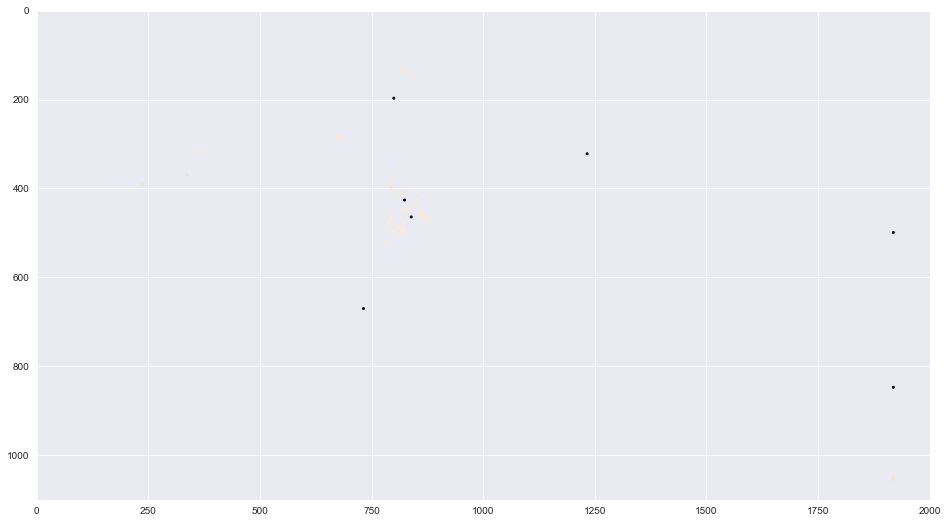

In [1041]:
df_filter = df_new[(df_new['Timestamp'].between(160,165) == True)]
#df_filter = df_filter[(df_new["Fixation"] == 0) == True]
x = df_filter["Gaze X"]
y = df_filter["Gaze Y"]
z = df_filter['Fixation']
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
#t = df["Timestamp"].head(100)
plt.axis([0,2000,1100,0])
plt.scatter(x,y, s = 4, c=z)
plt.show()

In [1033]:
df_filter

,Unnamed: 0,Timestamp,Gaze X,Gaze Y,Lost Track,Confidence,Timestamp in ms,dx,dy,d,vx,vy,v,a,Fixation
3611,3611,160.023674,238,389,0,TrackingConfidence.HIGH,160023,99.0,-19.0,100.0,2131.0,408.0,2169.0,1.0,454.0
3613,3613,160.100513,337,370,0,TrackingConfidence.HIGH,160100,487.0,56.0,490.0,10506.0,1208.0,10575.0,1.0,455.0
3614,3614,160.146865,824,426,0,TrackingConfidence.HIGH,160146,2.0,-13.0,13.0,64.0,421.0,426.0,0.0,0.0
3615,3615,160.177695,826,413,0,TrackingConfidence.HIGH,160177,-4.0,-3.0,5.0,-85.0,64.0,107.0,0.0,456.0
3616,3616,160.224344,822,410,0,TrackingConfidence.HIGH,160224,32.0,7.0,32.0,682.0,149.0,698.0,1.0,456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723,3723,164.805882,798,497,0,TrackingConfidence.HIGH,164805,4.0,2.0,4.0,85.0,42.0,95.0,1.0,466.0
3724,3724,164.852683,802,499,0,TrackingConfidence.HIGH,164852,-18.0,-12.0,21.0,-390.0,260.0,469.0,0.0,466.0
3725,3725,164.898793,784,487,0,TrackingConfidence.HIGH,164898,-3.0,31.0,31.0,-93.0,969.0,973.0,0.0,466.0
3726,3726,164.930776,781,518,0,TrackingConfidence.HIGH,164930,-49.0,152.0,159.0,-1069.0,3317.0,3486.0,0.0,0.0


In [656]:
df_filter[['Gaze X','Gaze Y','Fixation','v','d']]
#df_test = df_filter.loc[(df_filter['Fixation'] == 0) & (df_filter['v'] != 0) == True]
#df_test[['Gaze X','Gaze Y','Fixation','v','d']]

,Gaze X,Gaze Y,Fixation,v,d
485,1157,512,28.0,0.0,0.0
486,1157,512,28.0,306.0,5.0
487,1162,515,28.0,0.0,0.0
488,1162,515,28.0,1175.0,22.0
489,1184,511,28.0,0.0,0.0
...,...,...,...,...,...
714,1070,456,37.0,502.0,10.0
715,1060,457,37.0,0.0,0.0
716,1060,457,37.0,410.0,7.0
721,1082,574,38.0,0.0,0.0


In [696]:

fix_count = df_new['Fixation'].value_counts(sort=False)
#df_new['Fixation Count'] = df_new['Fixation'].value_counts()
#df_new['Fixation count'] = pd.merge(df_new,fix_count,on='Fixation')

Float64Index([   1.0,    0.0,    2.0,    3.0,    4.0,    5.0,    6.0,    7.0,
                 8.0,   10.0,
              ...
               674.0,  798.0,  970.0, 1292.0, 1301.0,  647.0,  797.0,  891.0,
              1186.0, 1287.0],
             dtype='float64', length=1322)

In [877]:
df_sac = pd.DataFrame({'Saccades': []})
    f = 1
    for i in range(len(df)):
        try:
            p = i - 1
            j = i + 1
            k = j + 1
            d = 30  # absoluter Abstand
            try:
                if df.iloc[i]['Fixation'] == 0:
                    df_sac = df_sac.append({'Saccade':f}, ignore_index=True).astype(int)
                    if np.isnan() == True:
                        pass
                else:
                    f += 1
                    if np.isnan() == True:
                            pass
                    pass
            except ValueError: pass

        except IndexError:
            # df_fix = df_fix.append({'Fixation': 0}, ignore_index=True).astype(int)
            pass
    # df_fix = df_fix.shift(periods=1, axis=0, fill_value= 1)
    # d = df['Fixation'] = df_fix
    # d['Fixation'] = d['Fixation'].notna().astype(int)

1

,level_0,index,Unnamed: 0,Timestamp,Gaze X,Gaze Y,Lost Track,Confidence,Timestamp in ms,dx,dy,d,vx,vy,v,a,Fixation,Saccades
0,0,3611,3611,160.023674,238,389,0,TrackingConfidence.HIGH,160023,99.0,-19.0,100.0,2131.0,408.0,2169.0,1.0,282.0,0
1,1,3612,3612,160.070128,337,370,0,TrackingConfidence.HIGH,160070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,282.0,0
2,2,3613,3613,160.100513,337,370,0,TrackingConfidence.HIGH,160100,487.0,56.0,490.0,10506.0,1208.0,10575.0,1.0,282.0,0
3,3,3614,3614,160.146865,824,426,0,TrackingConfidence.HIGH,160146,2.0,-13.0,13.0,64.0,421.0,426.0,0.0,0.0,1
4,4,3615,3615,160.177695,826,413,0,TrackingConfidence.HIGH,160177,-4.0,-3.0,5.0,-85.0,64.0,107.0,0.0,283.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,97,3723,3723,164.805882,798,497,0,TrackingConfidence.HIGH,164805,4.0,2.0,4.0,85.0,42.0,95.0,1.0,290.0,0
98,98,3724,3724,164.852683,802,499,0,TrackingConfidence.HIGH,164852,-18.0,-12.0,21.0,-390.0,260.0,469.0,0.0,290.0,0
99,99,3725,3725,164.898793,784,487,0,TrackingConfidence.HIGH,164898,-3.0,31.0,31.0,-93.0,969.0,973.0,0.0,290.0,0
100,100,3726,3726,164.930776,781,518,0,TrackingConfidence.HIGH,164930,-49.0,152.0,159.0,-1069.0,3317.0,3486.0,0.0,290.0,0


In [1088]:
# Anzahl an Saccaden
df_sacc = ft.sac(df_filter)
try:
    del df_filter['Saccades']
    del df_filter['level_0']
except ValueError: pass
df_filter = pd.concat([df_filter.reset_index(),df_sacc],axis=1,)
df_filter
df_filter['Saccades'].value_counts(sort=False)
sac_count = df_filter['Saccades'].value_counts(sort=False).filter(like='1')
sac_count

1    7
Name: Saccades, dtype: int64

In [ ]:
"""
Export Ziel:
    Clip Länge
    Anzahl Fixationen
    Gesamt Dauer Fixationen
    Anzahl Sakkaden
    Gesamt Dauer Sakkaden
    Anzahl Lost Tracks
    Dauer Lost Tracks
"""

In [1042]:
df_pipe = pd.DataFrame({'Clip Länge': [], 'Anzahl Fixation': [], 'Gesamt Dauer Fixation': [], "Anzahl Sakkaden": [], "Gesamt Dauer Sakkaden": [], "Anzahl Lost Tracks": [], "Dauer Lost Tracks": []})

0     NaN
105   NaN
Name: Timestamp, dtype: float64